In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
gold = pd.read_csv("Gold Price.csv")
bitcoin = pd.read_csv("bitcoin_price_dataset_2015_2023.csv")

In [4]:
gold

,Date,Price,Open,High,Low,Volume,Chg%
0,2024-11-06,77030,78300,78570,77030,0,-1.86
1,2024-11-05,78490,78224,78670,78160,0,0.11
2,2024-11-04,78401,78498,78642,78237,0,-0.54
3,2024-11-01,78829,78650,78887,78550,0,0.64
4,2024-10-31,78326,79264,79999,77803,90,-1.17
...,...,...,...,...,...,...,...
2801,2014-01-06,29119,29300,29395,29051,24380,-0.55
2802,2014-01-04,29279,29279,29279,29279,0,-1.51
2803,2014-01-03,29727,30031,30125,29539,3050,-0.83
2804,2014-01-02,29975,29678,30050,29678,3140,1.47


In [5]:
bitcoin

,Date,Open Price (USD),High Price (USD),Low Price (USD),Closing Price (USD),Adjusted Closing Price (USD),Trading Volume
0,2023-09-06,25772.601563,25845.994141,25708.595703,25721.945313,25721.945313,10252755968
1,2023-09-05,25814.957031,25858.375000,25589.988281,25779.982422,25779.982422,11094740040
2,2023-09-04,25968.169922,26081.525391,25657.025391,25812.416016,25812.416016,10680635106
3,2023-09-03,25869.472656,26087.148438,25817.031250,25969.566406,25969.566406,8962524523
4,2023-09-02,25800.910156,25970.285156,25753.093750,25868.798828,25868.798828,10100387473
...,...,...,...,...,...,...,...
3166,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
3167,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
3168,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
3169,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650


In [6]:
df = pd.merge(gold, bitcoin, on="Date", how="inner")
df

,Date,Price,Open,High,Low,Volume,Chg%,Open Price (USD),High Price (USD),Low Price (USD),Closing Price (USD),Adjusted Closing Price (USD),Trading Volume
0,2023-09-06,59111,59208,59310,59021,6940,-0.32,25772.601563,25845.994141,25708.595703,25721.945313,25721.945313,10252755968
1,2023-09-05,59301,59550,59550,59150,30,-0.14,25814.957031,25858.375000,25589.988281,25779.982422,25779.982422,11094740040
2,2023-09-04,59385,59125,59540,59101,90,0.47,25968.169922,26081.525391,25657.025391,25812.416016,25812.416016,10680635106
3,2023-09-01,59106,59082,59507,59051,400,-0.01,25934.021484,26125.869141,25362.609375,25800.724609,25800.724609,17202862221
4,2023-08-31,59113,59138,59379,59001,200,-0.01,27301.929688,27456.078125,25752.929688,25931.472656,25931.472656,20181001451
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,2015-01-07,27159,27328,27350,27110,19660,-0.83,286.076996,298.753998,283.079010,294.337006,294.337006,24866800
2234,2015-01-06,27385,27095,27442,27094,26640,2.00,274.610992,287.553009,272.696014,286.188995,286.188995,23245700
2235,2015-01-05,26847,26800,26911,26650,570,0.55,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
2236,2015-01-02,26700,26585,26740,26285,1990,0.43,314.079010,315.838989,313.565002,315.032013,315.032013,7860650


In [9]:
df.drop(columns=['Adjusted Closing Price (USD)'], inplace=True)
df.columns = ['Date', 'FCP_Gold', 'OP_Gold', 'HP_Gold', 'LP_Gold','TV_Gold',
              'CHG%_Gold', 'OP_BTC', 'HP_BTC', 'LP_BTC', 'FCP_BTC','TV_BTC']

In [32]:
df[['OP_BTC', 'HP_BTC', 'LP_BTC', 'FCP_BTC']] = df[['OP_BTC', 'HP_BTC', 'LP_BTC', 'FCP_BTC']].round(0).astype(int)
df['CHG%_BTC'] = ((df['FCP_BTC'] - df['FCP_BTC'].shift(-1)) / df['FCP_BTC'].shift(-1) * 100).round(2)
df.insert(4, 'FCP_Gold', df.pop('FCP_Gold'))
df.loc[2237,'CHG%_BTC'] = -1.90
df

,Date,OP_Gold,HP_Gold,LP_Gold,FCP_Gold,TV_Gold,CHG%_Gold,OP_BTC,HP_BTC,LP_BTC,FCP_BTC,TV_BTC,CHG%_BTC
0,2023-09-06,59208,59310,59021,59111,6940,-0.32,25773,25846,25709,25722,10252755968,-0.22
1,2023-09-05,59550,59550,59150,59301,30,-0.14,25815,25858,25590,25780,11094740040,-0.12
2,2023-09-04,59125,59540,59101,59385,90,0.47,25968,26082,25657,25812,10680635106,0.04
3,2023-09-01,59082,59507,59051,59106,400,-0.01,25934,26126,25363,25801,17202862221,-0.50
4,2023-08-31,59138,59379,59001,59113,200,-0.01,27302,27456,25753,25931,20181001451,-5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,2015-01-07,27328,27350,27110,27159,19660,-0.83,286,299,283,294,24866800,2.80
2234,2015-01-06,27095,27442,27094,27385,26640,2.00,275,288,273,286,23245700,4.38
2235,2015-01-05,26800,26911,26650,26847,570,0.55,265,278,265,274,43962800,-13.02
2236,2015-01-02,26585,26740,26285,26700,1990,0.43,314,316,314,315,7860650,0.32


OP_BTC = open price Bitcoin                
OP_Gold = open price Gold      

HP_BTC = highest price Bitcoin                
HP_Gold = highest price Gold         

LP_BTC = lowest price Bitcoin                
LP_Gold = lowest price Gold                       
                
FCP_BTC = final closing price Bitcoin                
FCP_Gold = final closing price Gold                
                
TV_BTC = trading volume Bitcoin                
TV_Gold = trading volume Gold                
                
CHG%_BTC = % price change of Bitcoin                
CHG%_Gold = % price change of gold                
                
Gold = price per 10gr                
                
Добавили переменную CHG%_BTC для сравнения с золотом (как %-ое изменение FCP за день)                
В BTC убрали дробные части                
Скорректировали данные по общим датам, где-то пришлось урезать количество наблюдений                
Все параметры в $ (USD)

In [35]:
print(f'Количество пропусков в df: {df.isnull().sum().sum()}')
print(f'Количество дублей в df: {df.duplicated().sum()}')

Количество пропусков в df: 0
Количество дублей в df: 0


In [36]:
df.describe()

,OP_Gold,HP_Gold,LP_Gold,FCP_Gold,TV_Gold,CHG%_Gold,OP_BTC,HP_BTC,LP_BTC,FCP_BTC,TV_BTC,CHG%_BTC
count,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2.238000e+03,2238.000000
mean,38653.550492,38857.650581,38442.591600,38650.211796,12930.209115,0.039035,14331.951743,14702.324397,13921.485702,14335.179178,1.803433e+10,0.294584
std,10817.185529,10878.552995,10750.090447,10815.822719,11291.755937,0.806080,16089.757456,16522.476688,15591.650944,16076.162320,2.055511e+10,4.420609
min,24583.000000,24635.000000,24470.000000,24545.000000,0.000000,-5.610000,177.000000,212.000000,172.000000,178.000000,7.860650e+06,-37.160000
25%,29319.500000,29456.750000,29192.500000,29340.000000,6315.000000,-0.380000,1049.250000,1079.250000,1031.000000,1055.750000,2.645232e+08,-1.477500
50%,32635.500000,32800.000000,32480.500000,32591.500000,10610.000000,0.040000,8223.500000,8393.500000,8003.000000,8230.000000,1.363268e+10,0.195000
75%,48752.500000,49032.000000,48500.250000,48804.250000,16785.000000,0.460000,22211.250000,22667.750000,21435.500000,22220.750000,2.988738e+10,2.127500
max,61899.000000,61899.000000,61150.000000,61683.000000,106920.000000,5.300000,67550.000000,68790.000000,66382.000000,67567.000000,3.509679e+11,25.240000


мб вывод какой то

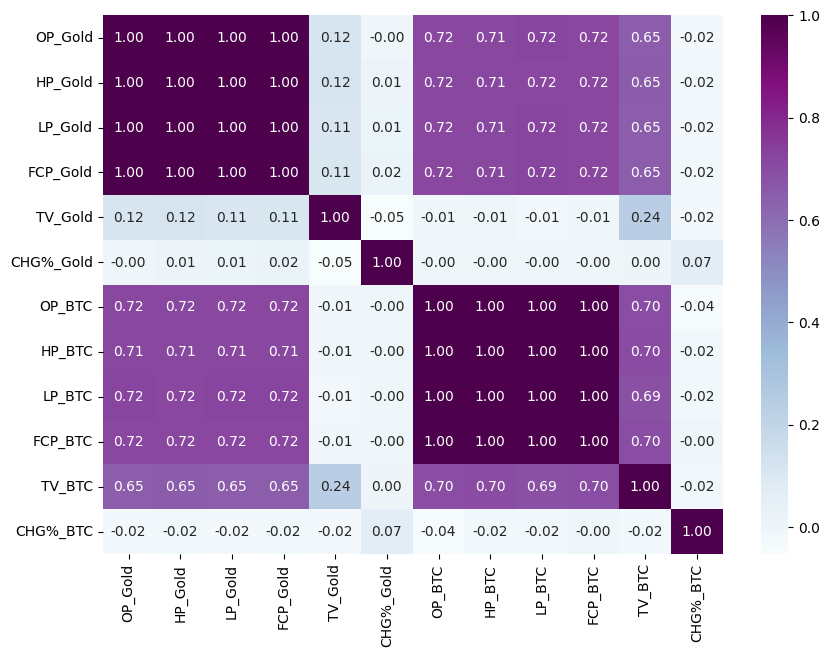

In [39]:
df_corr = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 7))
ax = sns.heatmap(df_corr, cmap="BuPu", annot=True, fmt="0.2f")
plt.show()

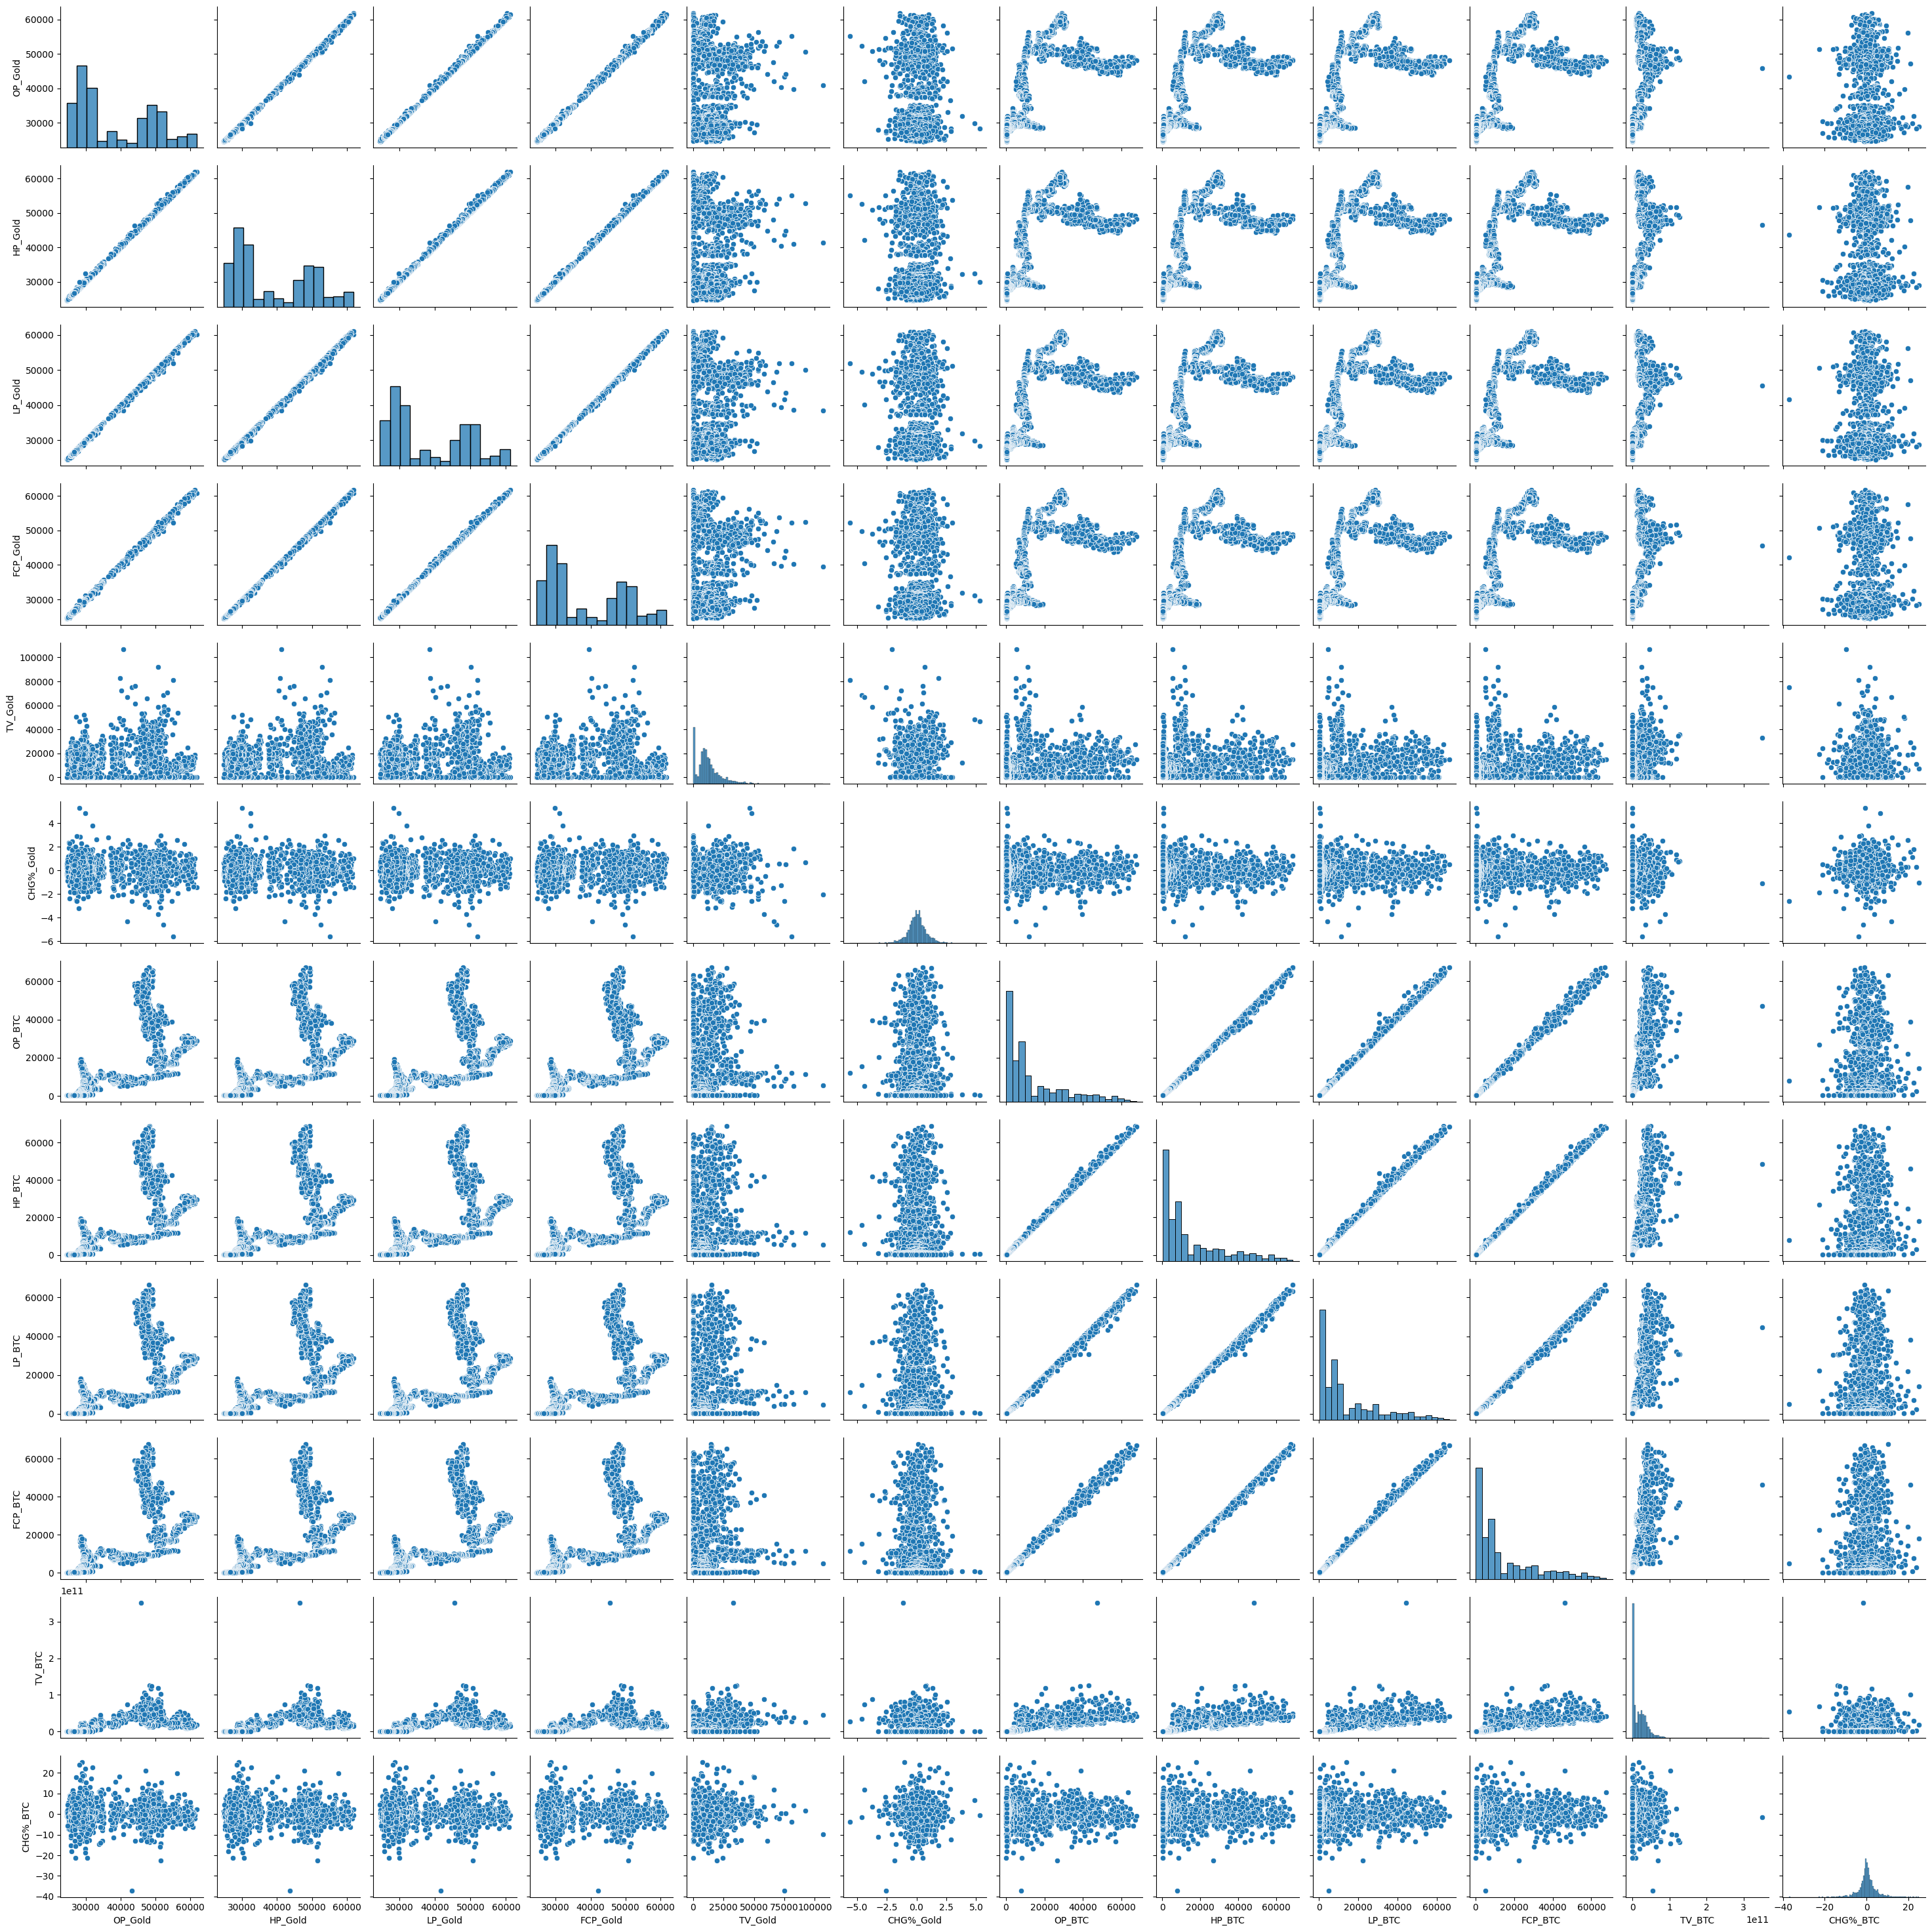

In [40]:
sns.pairplot(df)